<a href="https://colab.research.google.com/github/oskar-kaluza-pjatk/1_semestr_EWD_Prezentacja/blob/main/drzewa_automl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o
!pip install xlwt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=ba57cd35a77e4562e7d65066e520997f4bca7f402056dc3d47966d0e9f821dbe
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
h2o.init(max_mem_size = "8G")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8rs5jt09
  JVM stdout: /tmp/tmp8rs5jt09/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8rs5jt09/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_chluyi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dane/motywacja.csv')

In [ ]:
df.columns

Index(['Sygnatura czasowa', 'Podaj płeć ', 'Wiek', 'Wybierz województwo',
       'Podaj wielkość swojego miasta/gminy ', 'Twoje główne źródło dochodu',
       'Wykształcenie', 'Staż pracy', 'W jakim charakterze pracujesz? ',
       'Zarobki netto (do ręki)',
       'Czy w Twoim miejscu pracy jesteś odpowiednio motywowany/-a?',
       'Akcje/obligacje/udziały w zyskach firmy',
       'Bilety na imprezy kulturalne i sportowe ', 'Bony towarowe',
       'Ciekawa i urozmaicona praca', 'Darmowy bufet firmowy',
       'Dobra atmosfera w miejscu pracy',
       'Docenianie działań przez przełożonych ',
       'Dodatkowe ubezpieczenie na życie', 'Dodatkowe ubezpieczenie zdrowotne',
       'Elastyczny czas pracy', 'Jasna ścieżka awansu',
       'Karty i kupony umożliwiające korzystanie z obiektów sportowych i rekreacyjnych ',
       'Kredyt dla pracowników na preferencyjnych warunkach',
       'Laptop służbowy', 'Mieszkanie służbowe',
       'Możliwość samodzielnego podejmowania decyzji',
       

In [ ]:
#usunięcie kolumny 'Sygnatura czasowa'
df.drop('Sygnatura czasowa', axis=1, inplace=True)
#Usunięcie niepotrzebnych kolumn w analizie
df.drop(df.columns[1:10], axis=1, inplace=True)
#Zmiana nazwy kolumny Płeć
df = df.rename(columns={'Podaj płeć ': 'Płeć', 'Rozbudowany pakiet socjalny (np. dofinansowanie przedszkola, szkoły, "wczasy pod gruszą")': 'Rozbudowany pakiet socjalny'})


In [ ]:
df=h2o.H2OFrame(pd.DataFrame(df), separator=',')
df = df.na_omit() #Usunięcie NAN (pierwsza wiersz)
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Płeć,Akcje/obligacje/udziały w zyskach firmy,Bilety na imprezy kulturalne i sportowe,Bony towarowe,Ciekawa i urozmaicona praca,Darmowy bufet firmowy,Dobra atmosfera w miejscu pracy,Docenianie działań przez przełożonych,Dodatkowe ubezpieczenie na życie,Dodatkowe ubezpieczenie zdrowotne,Elastyczny czas pracy,Jasna ścieżka awansu,Karty i kupony umożliwiające korzystanie z obiektów sportowych i rekreacyjnych,Kredyt dla pracowników na preferencyjnych warunkach,Laptop służbowy,Mieszkanie służbowe,Możliwość samodzielnego podejmowania decyzji,Możliwość sprawdzenia się w różnych rolach w firmie,Możliwość utraty części wynagrodzenia,Możliwość zarządzania zespołem,Nagrody rzeczowe,Obawa przed naganą,Odpowiednie wyposażenie stanowiska pracy,"Organizacja czasu po pracy, przez pracodawcę",Paczki świąteczne,Partycypacja w zarządzaniu,Praca zapewniająca wystarczającą Ilość czasu wolnego,Precyzyjne wyznaczenie zadań i celów,Premie i nagrody pieniężne,Presja przełożonych,Prestiż stanowiska lub firmy,Rodzaj zajmowanego stanowiska,Rozbudowany pakiet socjalny,Samochód służbowy,Stała informacja o bieżącej kondycji firmy,"Szkolenia, studia, kursy",Telefon służbowy,"Udział, bądź realizacja ambitnych zadań, celów i projektów",Wyjazdy i imprezy integracyjne,Wysokość płacy zasadniczej,Zagrożenie przeniesienia na gorsze stanowisko,Zagrożenie utratą pracy,Znikomy poziom stresu,Zniżki na produkty i usługi firmowe,Zwrot za dojazdy do miejsca pracy
Mężczyzna,1,7,7,10,4,10,10,7,10,5,10,8,3,1,5,8,7,1,9,8,1,4,2,7,10,10,10,8,2,6,6,5,7,1,10,3,10,1,8,2,1,8,5,6
Kobieta,1,2,1,9,7,4,1,3,2,1,5,3,3,4,1,1,1,1,2,1,1,1,5,1,2,1,2,2,2,9,7,1,1,1,1,1,1,2,1,1,8,7,1,1
Mężczyzna,10,5,1,9,2,9,9,1,1,10,6,1,2,2,8,9,9,1,9,1,1,4,1,1,9,9,8,9,1,7,9,1,9,9,7,1,9,2,9,1,1,8,1,7
Kobieta,5,3,3,7,4,8,9,9,7,9,7,4,2,1,9,10,2,1,3,4,3,2,1,1,2,8,2,10,1,6,5,6,6,1,1,1,2,1,10,1,1,1,1,5
Kobieta,5,5,5,8,7,9,9,8,8,9,9,9,9,9,10,10,8,1,8,5,1,8,1,5,8,10,8,10,1,10,10,10,10,9,10,5,8,8,10,1,1,9,5,8
Kobieta,8,2,2,9,3,9,10,10,10,10,10,4,3,3,3,10,10,1,10,5,2,7,2,2,10,10,10,10,2,9,9,8,8,9,10,2,10,1,10,2,3,7,2,8
Mężczyzna,3,4,7,5,8,7,7,6,6,9,9,8,5,8,8,9,5,1,5,7,1,7,1,7,6,9,7,10,1,4,4,9,8,8,8,8,7,6,8,3,1,9,5,9
Kobieta,7,6,2,8,7,8,10,9,9,9,10,6,7,6,7,8,9,1,2,7,5,6,2,8,6,9,9,10,6,5,6,9,7,6,9,6,7,7,10,5,4,10,9,9
Kobieta,10,4,10,10,3,10,10,10,10,10,10,4,6,8,10,10,9,1,10,8,10,10,1,10,9,10,10,10,10,10,10,10,10,8,10,10,10,8,10,9,9,10,7,10
Mężczyzna,1,3,1,10,6,7,10,5,5,8,7,6,1,6,7,10,9,1,1,3,1,4,1,8,7,9,8,8,3,4,7,1,1,4,9,1,10,5,5,1,1,4,3,1


In [ ]:
kobiety = df[df['Płeć'] == 'Kobieta'].as_data_frame().sample(100)
mezczyzni = df[df['Płeć'] == 'Mężczyzna'].as_data_frame().sample(100)
testowy = h2o.H2OFrame(pd.concat([kobiety, mezczyzni]).sample(frac=1))
testowy=testowy.na_omit() #Usunięcie NAN (pierwsza wiersz)
testowy_pd = testowy.as_data_frame()
df_pd = df.as_data_frame()
df_czyszczenie = df_pd[~df_pd.isin(testowy_pd)].dropna()
df = h2o.H2OFrame(df_czyszczenie)
df = df.na_omit() #Usunięcie NAN (pierwsza wiersz)
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Płeć,Akcje/obligacje/udziały w zyskach firmy,Bilety na imprezy kulturalne i sportowe,Bony towarowe,Ciekawa i urozmaicona praca,Darmowy bufet firmowy,Dobra atmosfera w miejscu pracy,Docenianie działań przez przełożonych,Dodatkowe ubezpieczenie na życie,Dodatkowe ubezpieczenie zdrowotne,Elastyczny czas pracy,Jasna ścieżka awansu,Karty i kupony umożliwiające korzystanie z obiektów sportowych i rekreacyjnych,Kredyt dla pracowników na preferencyjnych warunkach,Laptop służbowy,Mieszkanie służbowe,Możliwość samodzielnego podejmowania decyzji,Możliwość sprawdzenia się w różnych rolach w firmie,Możliwość utraty części wynagrodzenia,Możliwość zarządzania zespołem,Nagrody rzeczowe,Obawa przed naganą,Odpowiednie wyposażenie stanowiska pracy,"Organizacja czasu po pracy, przez pracodawcę",Paczki świąteczne,Partycypacja w zarządzaniu,Praca zapewniająca wystarczającą Ilość czasu wolnego,Precyzyjne wyznaczenie zadań i celów,Premie i nagrody pieniężne,Presja przełożonych,Prestiż stanowiska lub firmy,Rodzaj zajmowanego stanowiska,Rozbudowany pakiet socjalny,Samochód służbowy,Stała informacja o bieżącej kondycji firmy,"Szkolenia, studia, kursy",Telefon służbowy,"Udział, bądź realizacja ambitnych zadań, celów i projektów",Wyjazdy i imprezy integracyjne,Wysokość płacy zasadniczej,Zagrożenie przeniesienia na gorsze stanowisko,Zagrożenie utratą pracy,Znikomy poziom stresu,Zniżki na produkty i usługi firmowe,Zwrot za dojazdy do miejsca pracy
Kobieta,6,9,8,8,7,10,8,6,6,8,7,9,7,6,6,7,6,3,5,6,6,7,4,6,5,7,6,7,6,3,5,7,2,4,5,2,5,6,8,6,7,5,5,5
Kobieta,5,3,10,5,1,10,8,3,6,10,8,4,3,10,10,10,3,1,10,7,3,10,2,7,2,8,6,10,1,1,4,5,10,6,9,8,6,8,10,5,5,10,2,10
Mężczyzna,10,1,10,10,7,10,10,7,7,8,8,1,7,1,10,10,10,1,10,8,1,5,5,8,10,10,10,10,1,8,8,10,10,8,8,8,10,8,10,1,1,10,7,10
Kobieta,6,7,7,10,4,10,10,7,8,10,7,8,7,7,7,10,9,4,2,3,3,10,1,2,4,10,10,6,1,6,7,5,7,6,8,6,9,7,7,1,2,10,4,10
Mężczyzna,10,6,4,6,3,8,7,8,8,10,10,4,5,5,6,7,9,2,6,4,3,4,4,4,5,6,8,10,5,5,7,4,7,8,9,2,7,7,9,2,2,2,2,2
Mężczyzna,1,7,7,10,6,10,10,1,2,9,5,3,3,8,10,8,2,1,2,1,1,9,3,2,7,4,3,9,1,1,6,1,10,1,6,1,7,7,7,1,1,5,6,8
Kobieta,4,8,7,9,9,10,10,7,7,9,9,10,6,9,9,9,9,3,7,9,1,10,3,9,5,10,10,10,2,9,9,9,10,9,10,8,9,9,9,1,2,9,6,10
Mężczyzna,9,1,1,8,3,10,9,2,2,2,5,3,3,2,2,7,3,6,4,3,4,7,1,1,7,10,10,9,4,4,4,3,3,3,8,3,8,3,8,3,3,8,1,1
Mężczyzna,10,1,1,10,1,10,10,1,6,5,10,1,1,1,1,7,8,8,1,1,1,8,8,1,5,10,10,10,1,1,4,1,1,10,7,1,3,1,3,1,1,10,1,3
Kobieta,8,1,1,8,6,9,8,6,6,10,6,1,6,6,6,10,5,1,5,1,1,9,1,6,6,10,6,8,1,9,9,4,8,6,9,6,5,3,10,1,1,10,7,8


In [ ]:
testowy

Płeć,Akcje/obligacje/udziały w zyskach firmy,Bilety na imprezy kulturalne i sportowe,Bony towarowe,Ciekawa i urozmaicona praca,Darmowy bufet firmowy,Dobra atmosfera w miejscu pracy,Docenianie działań przez przełożonych,Dodatkowe ubezpieczenie na życie,Dodatkowe ubezpieczenie zdrowotne,Elastyczny czas pracy,Jasna ścieżka awansu,Karty i kupony umożliwiające korzystanie z obiektów sportowych i rekreacyjnych,Kredyt dla pracowników na preferencyjnych warunkach,Laptop służbowy,Mieszkanie służbowe,Możliwość samodzielnego podejmowania decyzji,Możliwość sprawdzenia się w różnych rolach w firmie,Możliwość utraty części wynagrodzenia,Możliwość zarządzania zespołem,Nagrody rzeczowe,Obawa przed naganą,Odpowiednie wyposażenie stanowiska pracy,"Organizacja czasu po pracy, przez pracodawcę",Paczki świąteczne,Partycypacja w zarządzaniu,Praca zapewniająca wystarczającą Ilość czasu wolnego,Precyzyjne wyznaczenie zadań i celów,Premie i nagrody pieniężne,Presja przełożonych,Prestiż stanowiska lub firmy,Rodzaj zajmowanego stanowiska,Rozbudowany pakiet socjalny,Samochód służbowy,Stała informacja o bieżącej kondycji firmy,"Szkolenia, studia, kursy",Telefon służbowy,"Udział, bądź realizacja ambitnych zadań, celów i projektów",Wyjazdy i imprezy integracyjne,Wysokość płacy zasadniczej,Zagrożenie przeniesienia na gorsze stanowisko,Zagrożenie utratą pracy,Znikomy poziom stresu,Zniżki na produkty i usługi firmowe,Zwrot za dojazdy do miejsca pracy
Kobieta,10,10,10,10,10,10,10,10,10,6,10,10,10,9,8,10,10,1,10,10,1,10,10,10,10,10,10,10,1,10,10,10,10,10,10,1,10,10,10,1,1,10,10,10
Mężczyzna,5,6,7,9,7,10,9,7,7,8,8,7,7,6,6,8,7,2,7,7,2,8,2,5,6,8,8,8,2,7,7,5,6,6,8,6,9,8,8,2,2,8,7,8
Kobieta,7,7,7,10,7,10,10,5,5,8,9,10,1,4,3,10,10,1,10,5,1,9,1,3,9,9,10,10,1,9,10,4,1,10,4,1,10,10,10,1,1,10,1,1
Kobieta,1,6,3,7,6,10,9,6,6,8,7,6,4,5,1,6,7,6,6,7,7,8,2,2,4,10,8,9,2,2,4,7,1,6,8,2,8,6,10,4,3,10,4,6
Kobieta,3,3,3,7,5,10,10,7,7,10,10,10,10,8,8,8,8,1,10,10,8,10,10,10,7,10,10,10,1,10,10,10,10,7,10,10,10,10,10,1,1,10,10,10
Mężczyzna,8,5,1,9,1,9,9,2,5,10,10,7,8,8,1,10,8,5,9,7,2,9,2,2,7,9,9,9,6,9,10,8,7,5,7,1,9,8,10,5,5,7,5,4
Kobieta,1,1,6,1,3,8,10,4,5,4,5,4,8,5,3,2,2,8,2,10,3,4,3,10,3,8,4,10,3,1,1,6,1,1,5,1,1,5,10,3,10,10,2,4
Kobieta,5,4,6,6,4,8,8,8,8,8,8,4,4,8,8,7,6,2,3,7,3,5,3,5,5,7,10,10,4,5,5,6,6,7,7,7,7,2,8,5,4,9,4,7
Kobieta,2,7,8,8,8,10,8,7,7,8,8,9,8,7,6,7,6,1,6,7,6,7,1,6,8,9,7,9,7,8,8,9,8,8,8,7,8,7,5,7,6,5,7,8
Mężczyzna,6,3,1,7,5,8,8,6,6,8,8,2,2,2,2,6,5,1,5,1,1,6,4,1,1,10,10,10,3,3,7,3,1,4,8,1,8,4,1,1,1,7,1,4


In [ ]:
y = df.columns[0]
x = df.columns[1:]

In [ ]:
automl = H2OAutoML(max_models=200, seed=69, sort_metric="mean_per_class_error", nfolds=10, balance_classes=True,exclude_algos=['StackedEnsemble','DeepLearning'])
automl.train(x=x, y=y, training_frame=df, validation_frame=testowy )


AutoML progress: |
19:51:27.105: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20231214_195127_model_145


Model Summary: 
    number_of_trees
--  -----------------
    48

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10532626036163362
RMSE: 0.32454007512421884
LogLoss: 0.3454202234268446
Mean Per-Class Error: 0.23888904767396746
AUC: 0.870466817396198
AUCPR: 0.669792929163445
Gini: 0.740933634792396

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29772631504705976
           Kobieta    Mężczyzna    Error    Rate
---------  ---------  -----------  -------  ----------------
Kobieta    10244      1039         0.0921   (1039.0/11283.0)
Mężczyzna  1019       1623         0.3857   (1019.0/2642.0)
Total      11263      2662         0.1478   (2058.0/13925.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.297726     0.611991  184
max f2                       0.16458      0.696011  267
max f0point5                 0.399021     0.653786  136
max accuracy                 0.37427      0.865278  146
max precision                0.923902     1         0
max recall                   0.0357035    1         388
max specificity              0.923902     1         0
max absolute_mcc             0.329084     0.52926   169
max min_per_class_accuracy   0.202869     0.783876  240
max mean_per_class_accuracy  0.202869     0.785317  240
max tns                      0.923902     11283     0
max fns                      0.923902     2641      0
max fps                      0.017322     11283     399
max tps                      0.0357035    2642      388
max tnr                      0.923902     1         0
max fnr                      0.923902     0.999621  0
max fpr                      0.017322     1         399
max tpr                      0.0357035    1         388

Gains/Lift Table: Avg response rate: 18.97 %, avg score: 18.90 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100539                   0.735755           5.08239    5.08239            0.964286         0.790324   0.964286                    0.790324            0.0510977       0.0510977                  408.239   408.239            0.0506545
2        0.0200359                   0.671921           4.85353    4.96837            0.920863         0.700536   0.942652                    0.745591            0.0484481       0.0995458                  385.353   396.837            0.0981277
3        0.030018                    0.617337           4.51226    4.8167             0.856115         0.644597   0.913876                    0.712007            0.0450416       0.144587                   351.226   381.67             0.141397
4        0.04                        0.577324           4.62602    4.76911            0.877698         0.598371   0.904847                    0.683649            0.0461771       0.190765                   362.602   376.911            0.186067
5        0.0500539                   0.540923           4.10356    4.63543            0.778571         0.557791   0.879484                    0.658369            0.0412566       0.232021                   310.356   363.543            0.224576
6        0.100036                    0.419008           3.41531    4.02581            0.647989         0.475481   0.763819                    0.566991            0.170704        0.402725                   241.531   302.581     

In [ ]:
predykcja= automl.leader.model_performance(testowy)
print(predykcja)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.22014327215243681
RMSE: 0.4691942797524676
LogLoss: 0.6298611176902461
Mean Per-Class Error: 0.195
AUC: 0.8712000000000001
AUCPR: 0.8789694475439618
Gini: 0.7424000000000002

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2271568477153778
           Kobieta    Mężczyzna    Error    Rate
---------  ---------  -----------  -------  ------------
Kobieta    85         15           0.15     (15.0/100.0)
Mężczyzna  24         76           0.24     (24.0/100.0)
Total      109        91           0.195    (39.0/200.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.227157     0.795812  90
max f2                       0.10689      0.869565  151
max f0point5                 0.273364     0.8375    74
max accuracy                 0.238318     0.805     84
max preci

In [ ]:
conf_matrix = predykcja.confusion_matrix()
print("Macierz Pomyłek:")
print(conf_matrix)

Macierz Pomyłek:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2271568477153778
           Kobieta    Mężczyzna    Error    Rate
---------  ---------  -----------  -------  ------------
Kobieta    85         15           0.15     (15.0/100.0)
Mężczyzna  24         76           0.24     (24.0/100.0)
Total      109        91           0.195    (39.0/200.0)


In [ ]:
conf_matrix

,Kobieta,Mężczyzna,Error,Rate
Kobieta,85.0,15.0,0.15,(15.0/100.0)
Mężczyzna,24.0,76.0,0.24,(24.0/100.0)
Total,109.0,91.0,0.195,(39.0/200.0)


   Kobieta  Mężczyzna
0     85.0       15.0
1     24.0       76.0


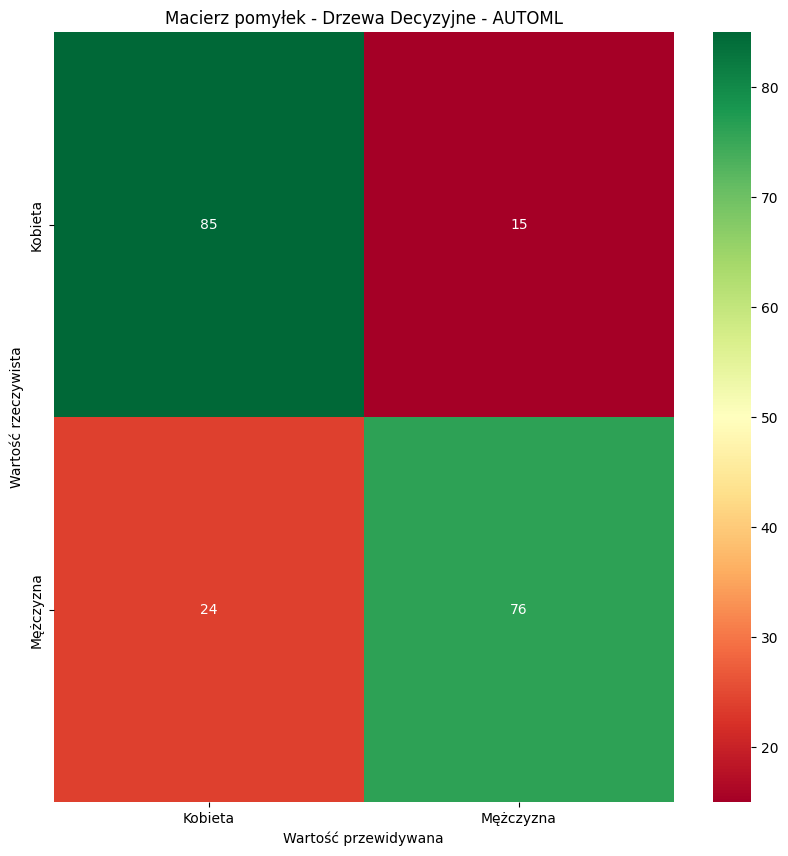

In [ ]:
cm = predykcja.confusion_matrix().table.as_data_frame()

cm=cm.iloc[0:2, 1:3]
print(cm)
tytul_wykresu='Drzewa Decyzyjne - AUTOML'
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Kobieta', 'Mężczyzna'], yticklabels=['Kobieta', 'Mężczyzna'], cmap='RdYlGn')
plt.title(f'Macierz pomyłek - {tytul_wykresu}')
plt.ylabel('Wartość rzeczywista')
plt.xlabel('Wartość przewidywana')
plt.savefig(tytul_wykresu.replace(" ", "_") + ".png")

In [ ]:
lb = automl.leaderboard
csv_lb=lb.head(rows=lb.nrows).as_data_frame()
csv_lb
csv_lb.to_excel('zestawienie_modeli.xls', index=False)
csv_lb


<ipython-input-17-9c095a573707>:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  csv_lb.to_excel('zestawienie_modeli.xls', index=False)


,model_id,mean_per_class_error,auc,logloss,aucpr,rmse,mse
0,XGBoost_grid_1_AutoML_1_20231214_195127_model_145,0.311765,0.746376,0.421122,0.445050,0.362897,0.131694
1,XGBoost_grid_1_AutoML_1_20231214_195127_model_48,0.312030,0.746512,0.421209,0.444042,0.363004,0.131772
2,XGBoost_grid_1_AutoML_1_20231214_195127_model_214,0.312809,0.746770,0.421317,0.441003,0.363096,0.131839
3,XGBoost_grid_1_AutoML_1_20231214_195127_model_54,0.313878,0.749118,0.420189,0.445467,0.362530,0.131428
4,XGBoost_grid_1_AutoML_1_20231214_195127_model_31,0.314325,0.745974,0.421562,0.442659,0.363257,0.131956
...,...,...,...,...,...,...,...
233,XGBoost_grid_1_AutoML_1_20231214_195127_model_271,0.360254,0.689789,0.553777,0.374503,0.400974,0.160780
234,XGBoost_grid_1_AutoML_1_20231214_195127_model_269,0.360564,0.684532,0.540350,0.362240,0.404019,0.163232
235,XGBoost_grid_1_AutoML_1_20231214_195127_model_196,0.360948,0.694323,0.539521,0.370280,0.402356,0.161891
236,GBM_grid_1_AutoML_1_20231214_195127_model_4,0.364351,0.677997,0.539071,0.357289,0.399119,0.159296


Najważniejsze zmienne dla modelu:
                                             variable  relative_importance  \
0             Akcje/obligacje/udziały w zyskach firmy           670.135803   
1              Docenianie działań przez przełożonych            603.703857   
2                                       Bony towarowe           465.928589   
3                         Rozbudowany pakiet socjalny           415.999359   
4                                  Paczki świąteczne            210.842255   
5            Bilety na imprezy kulturalne i sportowe            195.653732   
6                          Wysokość płacy zasadniczej           154.054550   
7                               Darmowy bufet firmowy           153.862885   
8                                 Presja przełożonych           150.498169   
9                         Ciekawa i urozmaicona praca           140.541321   
10                           Szkolenia, studia, kursy           132.454086   
11                            

<ipython-input-18-09edf5ac4363>:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  najwazniejsze_zmienne.to_excel('najwazniejsze_zmienne.xls', index=False)


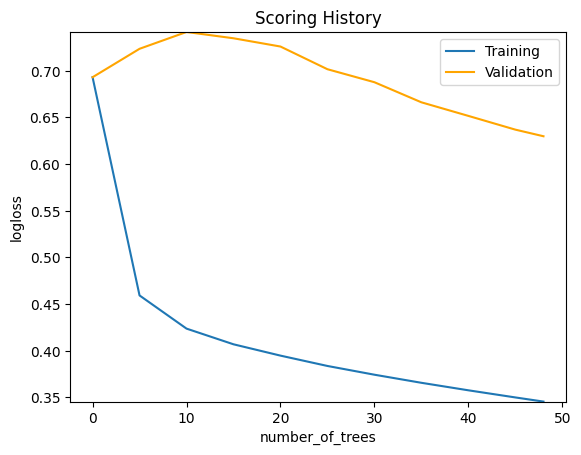

Statystyki na zbiorze testowym:
ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.22014327215243681
RMSE: 0.4691942797524676
LogLoss: 0.6298611176902461
Mean Per-Class Error: 0.195
AUC: 0.8712000000000001
AUCPR: 0.8789694475439618
Gini: 0.7424000000000002

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2271568477153778
           Kobieta    Mężczyzna    Error    Rate
---------  ---------  -----------  -------  ------------
Kobieta    85         15           0.15     (15.0/100.0)
Mężczyzna  24         76           0.24     (24.0/100.0)
Total      109        91           0.195    (39.0/200.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.227157     0.795812  90
max f2                       0.10689      0.869565  151
max f0point5                 0.273364     0.8375    74
max accuracy                 0.2

In [ ]:
best_model = automl.leader

najwazniejsze_zmienne = best_model.varimp(use_pandas=True)
print("Najważniejsze zmienne dla modelu:")
print(najwazniejsze_zmienne)
najwazniejsze_zmienne.to_excel('najwazniejsze_zmienne.xls', index=False)

print("\nUstawienia najlepszego modelu:\n")
print(best_model.actual_params)
best_model.plot()
statystyki_testowe = best_model.model_performance(test_data=testowy)
print("Statystyki na zbiorze testowym:")
print(statystyki_testowe)

print("Parametry najlepszego modelu:")
print(best_model.params)


In [ ]:
!cp * '/content/drive/MyDrive/dane/'

cp: -r not specified; omitting directory 'drive'
cp: -r not specified; omitting directory 'sample_data'
